# Data Preprocessing Lifecycle
- Data Integration
- Data Understanding
- Data Cleaning
- Data Reduction
- Feature Engineering
- Data Transformation

## Data Integration
- Data is stored in MySQL database

In [1]:
# Importing necessary libraries
import pandas as pd
import mysql.connector

### Establishing connection with database

In [2]:
# Establishing Connection
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'VermaS123$05!',
    database = 'st_project_1'
)
print(f"Successfully connected to {conn.server_info}")

Successfully connected to 8.0.42


### Loading data
- Data is loaded in python dataframe

In [3]:
# Creating a cursor object
cursor = conn.cursor()

# Query for retrieving data
query = """SELECT * FROM walmart_dataset;"""

# Executing query
cursor.execute(query)
rows = cursor.fetchall() # getting rows
columns = [row[0] for row in cursor.description] # getting column names

# Creating dataframe
data = pd.DataFrame(rows, columns = columns)

# Closing the connection
cursor.close()
conn.close()

### Explore data

In [4]:
# Creating data back-up
df = data.copy()
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,_date,_time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,2005-01-19,0 days 13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,2008-03-19,0 days 10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,2003-03-19,0 days 13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,2027-01-19,0 days 20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,2008-02-19,0 days 10:37:00,Ewallet,5.3,0.48


In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   invoice_id      10020 non-null  int64          
 1   Branch          10020 non-null  object         
 2   City            10020 non-null  object         
 3   category        10020 non-null  object         
 4   unit_price      10020 non-null  object         
 5   quantity        10020 non-null  float64        
 6   _date           10020 non-null  object         
 7   _time           10020 non-null  timedelta64[ns]
 8   payment_method  10020 non-null  object         
 9   rating          10020 non-null  float64        
 10  profit_margin   10020 non-null  float64        
dtypes: float64(3), int64(1), object(6), timedelta64[ns](1)
memory usage: 861.2+ KB


In [6]:
# Data statistics
df.describe()

,invoice_id,quantity,_time,rating,profit_margin
count,10020.000000,10020.000000,10020,10020.000000,10020.000000
mean,5035.386926,2.353493,0 days 15:35:07.107784431,5.824321,0.393722
std,2900.463112,1.602658,0 days 04:02:25.509515617,1.763615,0.090672
min,1.000000,1.000000,0 days 06:01:00,3.000000,0.180000
25%,2536.750000,1.000000,0 days 12:56:00,4.000000,0.330000
50%,5041.500000,2.000000,0 days 16:21:00,6.000000,0.330000
75%,7546.250000,3.000000,0 days 18:45:00,7.000000,0.480000
max,10000.000000,10.000000,0 days 23:00:00,10.000000,0.570000


### Data Cleaning
- Duplicate
- Null Values
- Data Type
- Outlier

#### Duplicate

In [7]:
# Count of duplicate rows
print(f"No. of duplicate rows: {df.duplicated().sum()}")

No. of duplicate rows: 51


In [8]:
# Filter duplicate rows
df[df.duplicated()]

,invoice_id,Branch,City,category,unit_price,quantity,_date,_time,payment_method,rating,profit_margin
9969,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,2027-11-23,0 days 09:15:00,Cash,3.0,0.48
9970,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,2008-07-20,0 days 12:39:00,Cash,6.0,0.33
9971,9952,WALM035,San Angelo,Fashion accessories,$76,3.0,2002-10-21,0 days 16:34:00,Cash,6.0,0.48
9972,9953,WALM084,Schertz,Home and lifestyle,$68,3.0,2013-06-21,0 days 10:52:00,Cash,5.0,0.33
9973,9954,WALM046,Temple,Fashion accessories,$40,1.0,2022-08-20,0 days 14:38:00,Cash,6.0,0.48
9974,9955,WALM054,Sherman,Home and lifestyle,$61,3.0,2005-12-21,0 days 07:46:00,Cash,3.0,0.21
9975,9956,WALM003,San Antonio,Fashion accessories,$17,3.0,2029-10-20,0 days 07:13:00,Cash,4.0,0.48
9976,9957,WALM029,Round Rock,Home and lifestyle,$53,1.0,2020-06-23,0 days 13:41:00,Cash,4.0,0.48
9977,9958,WALM084,Schertz,Fashion accessories,$35,2.0,2010-04-22,0 days 14:58:00,Cash,7.0,0.33
9978,9959,WALM065,Texas City,Home and lifestyle,$36,1.0,2011-03-22,0 days 10:26:00,Cash,4.0,0.33


In [9]:
# Drop duplicate rows
df.drop_duplicates(inplace = True)
print(f"No. of duplicate rows: {df.duplicated().sum()}")

No. of duplicate rows: 0


#### Null Values

In [10]:
# Creating a dictionary with Null Count and Null Percentage
print(f'Total datapoints: {len(df)}')
df_null = pd.DataFrame({'Null_count': df.isnull().sum(), 'Null_Percent': (df.isnull().sum()/len(df))*100})
df_null

Total datapoints: 9969


,Null_count,Null_Percent
invoice_id,0,0.0
Branch,0,0.0
City,0,0.0
category,0,0.0
unit_price,0,0.0
quantity,0,0.0
_date,0,0.0
_time,0,0.0
payment_method,0,0.0
rating,0,0.0


In [11]:
# Checking total data (rows and columns)
df.shape

(9969, 11)

#### Data Type Correction

In [12]:
# Changing 'price' datatype from object to numerical
df['unit_price'] = df['unit_price'].str.replace('$','')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors = 'coerce')

# Changing '_date" datatype from object to datetime
df['_date'] = pd.to_datetime(df['_date'], format = '%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9968
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   invoice_id      9969 non-null   int64          
 1   Branch          9969 non-null   object         
 2   City            9969 non-null   object         
 3   category        9969 non-null   object         
 4   unit_price      9969 non-null   float64        
 5   quantity        9969 non-null   float64        
 6   _date           9969 non-null   datetime64[ns] 
 7   _time           9969 non-null   timedelta64[ns]
 8   payment_method  9969 non-null   object         
 9   rating          9969 non-null   float64        
 10  profit_margin   9969 non-null   float64        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4), timedelta64[ns](1)
memory usage: 934.6+ KB


#### Outlier

In [13]:
# Outlier
df.describe()

,invoice_id,unit_price,quantity,_date,_time,rating,profit_margin
count,9969.000000,9969.000000,9969.000000,9969,9969,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,2016-04-25 21:31:30.460427264,0 days 15:36:10.839602768,5.828839,0.393744
min,1.000000,10.080000,1.000000,2001-01-19 00:00:00,0 days 06:01:00,3.000000,0.180000
25%,2524.000000,32.000000,1.000000,2008-08-22 00:00:00,0 days 12:58:00,4.000000,0.330000
50%,5016.000000,51.000000,2.000000,2016-06-22 00:00:00,0 days 16:22:00,6.000000,0.330000
75%,7508.000000,69.000000,3.000000,2023-12-23 00:00:00,0 days 18:46:00,7.000000,0.480000
max,10000.000000,99.960000,10.000000,2031-12-23 00:00:00,0 days 23:00:00,10.000000,0.570000
std,2886.217349,21.203766,1.605455,NaN,0 days 04:02:13.103040162,1.763723,0.090659


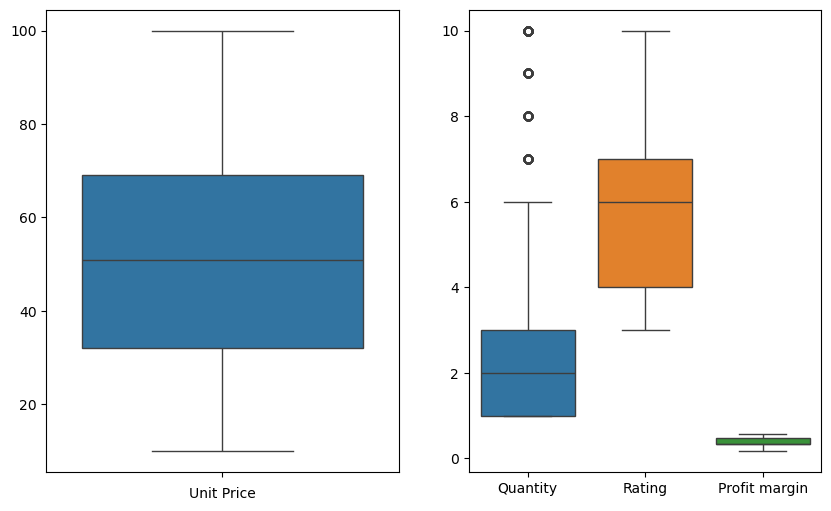

In [14]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outlier through box plot
fig, ax = plt.subplots(1,2, figsize = (10,6))
df_numeric = pd.DataFrame({'Quantity': df['quantity'], 'Rating': df['rating'], 'Profit margin': df['profit_margin']})
sns.boxplot(data = df['unit_price'], ax = ax[0])
ax[0].set_xlabel('Unit Price')
ax[0].set_ylabel('')
sns.boxplot(data = [df_numeric[i] for i in df_numeric.columns], ax = ax[1])
plt.show()

In [15]:
import numpy as np
# Function to remove outlier
def remove_outlier(data, column):
    quartile1 = np.quantile(data[column], 0.25)
    quartile3 = np.quantile(data[column], 0.75)
    iqr = quartile3 - quartile1
    max_data = quartile3 + 1.5*iqr
    min_data = quartile1 - 1.5*iqr
    data = data[(data[column] > min_data) & (data[column] < max_data)]
    return data

In [16]:
print("Shape of data before removing outlier: ", df.shape)
df = remove_outlier(df,'quantity').copy()
print("Shape of data after removing outlier: ", df.shape)

Shape of data before removing outlier:  (9969, 11)
Shape of data after removing outlier:  (9473, 11)


### Feature Engineering

In [17]:
# Creating Total Amount
df['total_amount'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,_date,_time,payment_method,rating,profit_margin,total_amount
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2008-03-19,0 days 10:29:00,Cash,9.6,0.48,76.40
8,9,WALM066,Grapevine,Health and beauty,36.26,2.0,2010-01-19,0 days 17:15:00,Credit card,7.2,0.33,72.52
9,10,WALM065,Texas City,Food and beverages,54.84,3.0,2020-02-19,0 days 13:27:00,Credit card,5.9,0.33,164.52
10,11,WALM013,Irving,Fashion accessories,14.48,4.0,2006-02-19,0 days 18:07:00,Ewallet,4.5,0.48,57.92
11,12,WALM035,San Angelo,Electronic accessories,25.51,4.0,2009-03-19,0 days 17:03:00,Cash,6.8,0.48,102.04


In [18]:
# Creating datetime
df['datetime'] = df['_date'] + df['_time']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,_date,_time,payment_method,rating,profit_margin,total_amount,datetime
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2008-03-19,0 days 10:29:00,Cash,9.6,0.48,76.40,2008-03-19 10:29:00
8,9,WALM066,Grapevine,Health and beauty,36.26,2.0,2010-01-19,0 days 17:15:00,Credit card,7.2,0.33,72.52,2010-01-19 17:15:00
9,10,WALM065,Texas City,Food and beverages,54.84,3.0,2020-02-19,0 days 13:27:00,Credit card,5.9,0.33,164.52,2020-02-19 13:27:00
10,11,WALM013,Irving,Fashion accessories,14.48,4.0,2006-02-19,0 days 18:07:00,Ewallet,4.5,0.48,57.92,2006-02-19 18:07:00
11,12,WALM035,San Angelo,Electronic accessories,25.51,4.0,2009-03-19,0 days 17:03:00,Cash,6.8,0.48,102.04,2009-03-19 17:03:00


In [19]:
# Removing date and time for avoiding data redundancy
df.drop(columns = ['_date','_time'], axis = 1, inplace = True)
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_amount,datetime
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,Cash,9.6,0.48,76.40,2008-03-19 10:29:00
8,9,WALM066,Grapevine,Health and beauty,36.26,2.0,Credit card,7.2,0.33,72.52,2010-01-19 17:15:00
9,10,WALM065,Texas City,Food and beverages,54.84,3.0,Credit card,5.9,0.33,164.52,2020-02-19 13:27:00
10,11,WALM013,Irving,Fashion accessories,14.48,4.0,Ewallet,4.5,0.48,57.92,2006-02-19 18:07:00
11,12,WALM035,San Angelo,Electronic accessories,25.51,4.0,Cash,6.8,0.48,102.04,2009-03-19 17:03:00


In [20]:
# Checking data before daving
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9473 entries, 1 to 9968
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9473 non-null   int64         
 1   Branch          9473 non-null   object        
 2   City            9473 non-null   object        
 3   category        9473 non-null   object        
 4   unit_price      9473 non-null   float64       
 5   quantity        9473 non-null   float64       
 6   payment_method  9473 non-null   object        
 7   rating          9473 non-null   float64       
 8   profit_margin   9473 non-null   float64       
 9   total_amount    9473 non-null   float64       
 10  datetime        9473 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 888.1+ KB


In [21]:
# Save clean data
df.to_csv(r"C:\Users\sukhd\OneDrive\Desktop\Summer Training\Python\walmart_cleaned_dataset.csv", index = False)